## 章節 6：決策分析（Dicision Analysis）

### 6.2 先驗分佈

要選擇價格的先驗分佈，我們可以用之前節目的數據。幸運的是有粉絲紀錄詳細的資料。當作者與 Davidson-Pilon 先生討論他的書籍時，他寄給作者一組 Steve Gee 收集的資料 http://tpirsummaries.8m.com (連結失效)。它包含了 2011, 2012 季度的每一展品的**真實價格以及參賽者的出價**。

資料集：

- [showcases.2011.csv](./showcases.2011.csv)
- [showcases.2012.csv](./showcases.2012.csv)

下方為 showcases.2011.csv 前十天的資料集

In [39]:
import pandas as pd
df = pd.read_csv("showcases.2011.csv", index_col=0).T
df.iloc[:10]

,nan,nan,Showcase 1,Showcase 2,nan,Bid 1,Bid 2,nan,Difference 1,Difference 2
Sep. 19,5631K,NaN,50969,45429,NaN,42000,34000,NaN,8969,11429
Sep. 20,5632K,NaN,21901,34061,NaN,14000,59900,NaN,7901,-25839
Sep. 21,5633K,NaN,32815,53186,NaN,32000,45000,NaN,815,8186
Sep. 22,5634K,NaN,44432,31428,NaN,27000,38000,NaN,17432,-6572
Sep. 23,5635K,NaN,24273,22320,NaN,18750,23000,NaN,5523,-680
Sep. 26,5641K,NaN,30554,24337,NaN,27222,18525,NaN,3332,5812
Sep. 27,5642K,NaN,20963,41373,NaN,25000,32000,NaN,-4037,9373
Sep. 28,5643K,NaN,28941,45437,NaN,35000,45000,NaN,-6059,437
Sep. 29,5644K,NaN,25851,41125,NaN,22500,32000,NaN,3351,9125
Sep. 30,5645K,NaN,28800,36319,NaN,21300,27500,NaN,7500,8819


接下來我們將過去兩種展示品 2011 和 2012 的價格分佈，分別作圖。

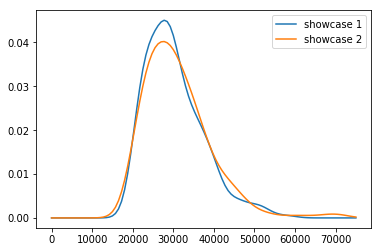

In [40]:
from thinkbayes import EstimatedPdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_pmf(pmf):
    x, y = zip(*sorted(pmf.Items()))
    plt.plot(x, y)

def simple_read_prices(file, showcase=1):
    col_name = "Showcase %d" % showcase        
    df = df = pd.read_csv(file, index_col=0).T
    return df[col_name].astype(int).values


def get_all_prices(showcase=1):
    data = ["showcases.2011.csv", "showcases.2012.csv"]
    return np.concatenate([simple_read_prices(file, showcase) for file in data])


def plot_kde_prices(showcase=1):
    prices = get_all_prices(showcase)
    pdf = EstimatedPdf(prices)

    low, high = 0, 75000
    n = 101
    xs = np.linspace(low, high, n)
    pmf = pdf.MakePmf(xs)
    plot_pmf(pmf)
    
plot_kde_prices(1)
plot_kde_prices(2)
plt.legend(["showcase 1", "showcase 2"])
plt.show()

上圖為過去兩種展示品 2011 和 2012 的價格分佈。兩次展示品最常見的價格為 28000 美元。展示品1 有第二個眾數接近 50000 美元處，而展示品2 偶爾會出現價格超過 70000 美元。（關於一些程式碼的意義，下一小節會說明，可以先看分佈圖）

上方的圖有做過高斯核密度估計（Gaussian kernel density estimation, KDE）平滑化。

再繼續解決估價問題之前，下一小節我想先來說說：

- 機率密度函數（probability density function, PDF)
- 高斯核密度估計(KDE)